In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import optuna


c:\Users\vinor\Desktop\Develhope\projects\EDU-TreeBasedModels\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/BreastCancer.csv')
df = df.drop(columns=['id'])

df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [17]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# Label encoding for the diagnosis column
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Simple training

In [ ]:
# Select the model
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_leaf=0.12, random_state=42)

# Fit rf to the training set    
rf_classifier.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf_classifier.predict(X_test)

# Evaluate the test set accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print('Test set Accuracy of rf: {:.2f}'.format(accuracy))

Test set Accuracy of rf: 0.95


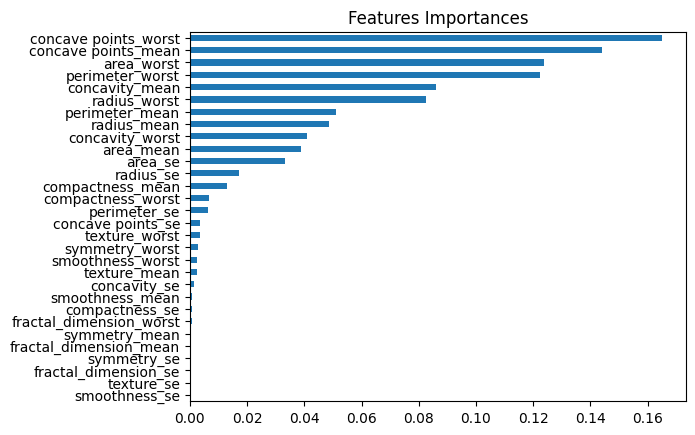

In [4]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf_classifier.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.show()

In [5]:
# The hyperparameters
print(rf_classifier.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.12,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Grid Search

In [6]:
# Define the dictionary 'params_rf'
params_rf = {
            'n_estimators' : [100,350,500],
            'max_features' : ['log2','sqrt'],
            'min_samples_leaf' : [2,10,30]            
}

In [7]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf_classifier,
                       param_grid=params_rf,
                       scoring='accuracy',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\vinor\Desktop\Develhope\projects\EDU-TreeBasedModels\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print Accuracy
print('Test Accuracy of best model: {:.3f}'.format(accuracy)) 

Test Accuracy of best model: 0.974


# Bayesian Optimization

In [ ]:
def objective(trial):
    # Definition of hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 100, 600)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)

    # Configuration of the model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Calculate the average score through cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1).mean()
    return score


In [18]:
# Create the study for the model
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

# Results
print("Migliori parametri trovati:", study.best_params)
print("Miglior score:", study.best_value)

[I 2025-04-15 09:17:02,062] A new study created in memory with name: no-name-3cc8bde6-548d-4994-810b-e2a028c6bbf3


[I 2025-04-15 09:17:23,063] Trial 0 finished with value: 0.9325674067173835 and parameters: {'n_estimators': 376, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 0.8669809783682696}. Best is trial 0 with value: 0.9325674067173835.
[I 2025-04-15 09:17:37,495] Trial 1 finished with value: 0.9354913833255706 and parameters: {'n_estimators': 557, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': 0.827806616566348}. Best is trial 1 with value: 0.9354913833255706.
[I 2025-04-15 09:17:46,190] Trial 2 finished with value: 0.9266935776018217 and parameters: {'n_estimators': 508, 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 15, 'max_features': 0.10486415770064814}. Best is trial 1 with value: 0.9354913833255706.
[I 2025-04-15 09:17:48,228] Trial 3 finished with value: 0.9384153599337578 and parameters: {'n_estimators': 256, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 0.98335944466

Migliori parametri trovati: {'n_estimators': 468, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 0.8263350025150296}
Miglior score: 0.9560368472804429


In [ ]:
# Select the best model
best_model = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    random_state=42
)

best_model.fit(X_train, y_train)
print("Accuracy sul test set:", best_model.score(X_test, y_test))


Accuracy sul test set: 0.956140350877193
